In [1]:
import argparse
import os
import pathlib
import sys

import numpy as np
import pandas as pd
from arg_parsing_utils import parse_args
from notebook_init_utils import bandicoot_check, init_notebook

root_dir, in_notebook = init_notebook()

profile_base_dir = bandicoot_check(
    pathlib.Path(os.path.expanduser("~/mnt/bandicoot")).resolve(), root_dir
)
if not in_notebook:
    args = parse_args()

    image_based_profiles_subparent_name = args["image_based_profiles_subparent_name"]
    import tqdm
else:
    image_based_profiles_subparent_name = "image_based_profiles"
    import tqdm.notebook as tqdm

In [2]:
patients_file_path = pathlib.Path(f"{root_dir}/data/patient_IDs.txt").resolve()
patients = pd.read_csv(patients_file_path, header=None)[0].tolist()

In [3]:
df_list = []
# patients = ["NF0014_T1"]  # TEMPORARY LIMIT FOR TESTING
for patient in tqdm.tqdm(patients, desc="Processing patients"):
    # pathing
    sc_annotated_path = pathlib.Path(
        f"{profile_base_dir}/data/{patient}/{image_based_profiles_subparent_name}/2.annotated_profiles/sc_anno.parquet"
    ).resolve(strict=True)
    sc_df = pd.read_parquet(sc_annotated_path)
    df_list.append(
        sc_df.groupby(["Metadata_patient_tumor", "Metadata_image_set"])
        .agg({"Neighbors_Neighbors_adjacent": "mean", "Neighbors_Neighbors_10": "mean"})
        .reset_index()
    )
df = pd.concat(df_list, ignore_index=True)

Processing patients:   0%|          | 0/12 [00:00<?, ?it/s]

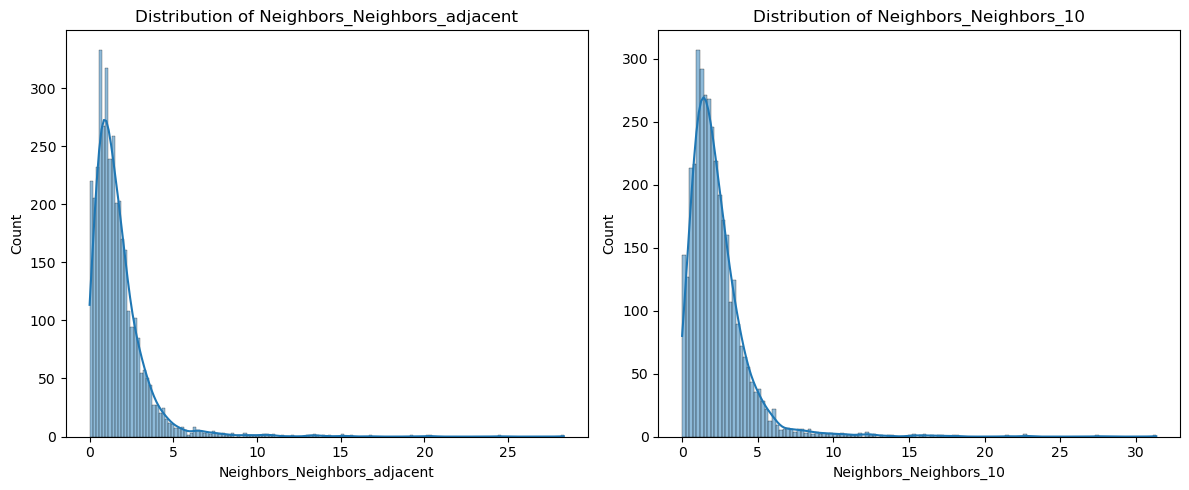

In [4]:
# plot the histograms of the two features
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x="Neighbors_Neighbors_adjacent", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Neighbors_Neighbors_adjacent")
sns.histplot(data=df, x="Neighbors_Neighbors_10", kde=True, ax=axes[1])
axes[1].set_title("Distribution of Neighbors_Neighbors_10")
plt.tight_layout()
plt.show()